# Figure 2: Map colored by conditional probabilities

### 1. Load packages

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from global_land_mask import globe
import scipy.stats as stats
import os
import importlib
import geopandas as gpd
# from tqdm import tqdm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
from matplotlib.lines import Line2D

# file containing functions:
import loadquakes
importlib.reload(loadquakes)

ERROR 1: PROJ: proj_create_from_database: Open of /home/amand4/anaconda3/envs/syamsul_2023/share/proj failed


<module 'loadquakes' from '/home/amand4/notebooks/SLIM/loadquakes.py'>

### 2. Load datasets

In [2]:
# GRACE data
dataset_path = '/data/fast1/surface-load/'
ds = xr.open_dataset(dataset_path + "GRCTellus.JPL.200204_202201.GLO.RL06M.MSCNv02CRI.nc")
catalog = pd.read_csv('catalog.csv')
etas_declustered = pd.read_csv('etas_declustered.csv')
NND_declustered = pd.read_csv('NND_declustered.csv')
NND_declustered_v2 = pd.read_csv('NND_declustered_v2.csv') # testing with eta0 = 10**3

### 3. Plot the SLIQs from the full catalog with highest CP

In [3]:
sliq_full=catalog.sort_values('cp',ascending=False)
sliq_full=sliq_full.reset_index()
sliq_full=sliq_full.drop(['index'], axis=1)

sliq_full['dmass']=sliq_full['dmass'].astype(float)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'SLIQs with highest conditional probability (full catalog)'}, xlabel='Longitude', ylabel='Latitude'>

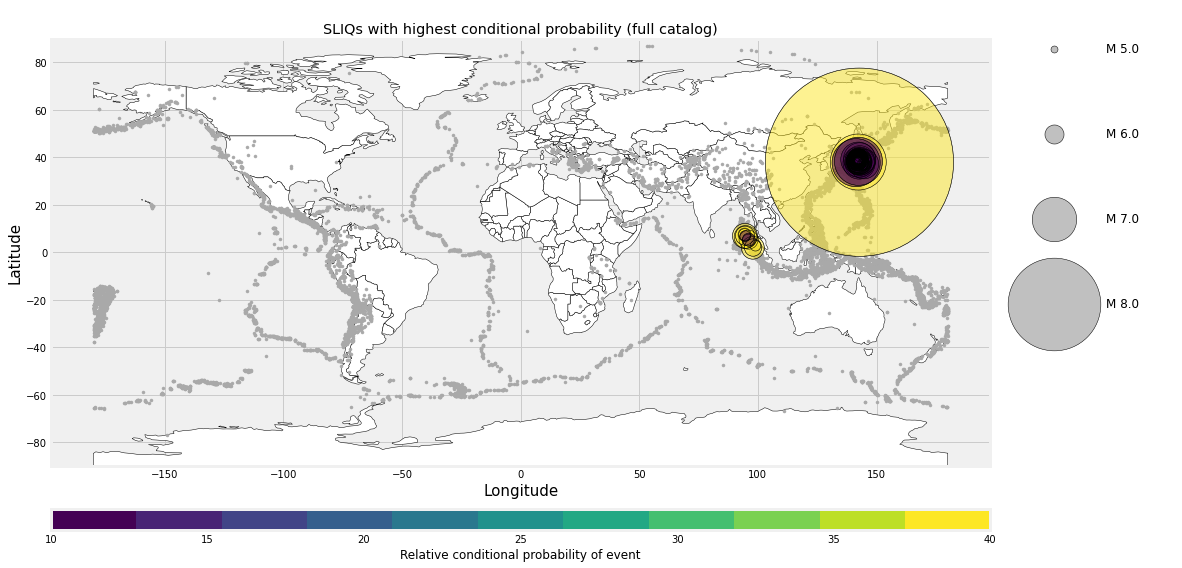

In [4]:
importlib.reload(loadquakes)
plt.style.use('fivethirtyeight')

loadquakes.probability_map_cb(catalog,sliq_full.head(100),sliq_full.cp.head(100),
                              'SLIQs with highest conditional probability (full catalog)',
                              10,40,11,circle_scale=1e-6)



### 4. Plot the SLIQs from the ETAS declustered catalog with highest CP

In [5]:
sliq_etas=etas_declustered.sort_values('cp',ascending=False)
sliq_etas=sliq_etas.reset_index()
sliq_etas=sliq_etas.drop(['index'], axis=1)

sliq_etas['dmass']=sliq_etas['dmass'].astype(float)

In [15]:
sliq_etas.head(100)

,Unnamed: 0,target_id,latitude,longitude,time,magnitude,geometry,mc_current,mc_current_above_ref,mu,P_triggered,P_background,zeta_plus_1,depth,dmass,cp
0,10466,10468,28.8810,94.6260,2005-06-01 20:06:41.450,5.8,POINT (28.881 94.626),5.4,0.0,6.907373e-11,0.796710,0.203290,1.0,25.80,31.352074,11.914214
1,11826,11828,29.5730,95.6050,2003-08-18 09:03:03.520,5.5,POINT (29.573 95.605),5.4,0.0,6.907373e-11,0.585476,0.414524,1.0,33.00,31.846877,11.914214
2,11862,11864,22.8540,92.3060,2003-07-26 23:18:17.960,5.7,POINT (22.854 92.306),5.4,0.0,6.907373e-11,0.891394,0.108606,1.0,10.00,31.683223,11.914214
3,3125,3127,-1.0355,31.6181,2016-09-10 12:27:33.410,5.9,POINT (-1.0355 31.6181),5.4,0.0,6.907373e-11,0.470086,0.529914,1.0,40.00,45.987494,9.359505
4,4410,4412,40.3731,51.5739,2014-06-07 06:05:29.910,5.5,POINT (40.3731 51.5739),5.4,0.0,6.907373e-11,0.792073,0.207927,1.0,30.51,-43.055702,7.904443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2119,2121,69.5762,-145.2910,2018-08-12 14:58:53.503,6.4,POINT (69.5762 -145.291),5.4,0.0,6.907373e-11,0.227195,0.772805,1.0,15.80,7.291455,1.461463
96,12469,12471,-4.9280,-12.3840,2002-06-25 21:47:23.720,5.6,POINT (-4.928 -12.384),5.4,0.0,6.907373e-11,0.678687,0.321313,1.0,10.00,-2.463010,1.460222
97,12286,12288,-1.8840,29.0040,2002-10-24 06:08:37.980,6.2,POINT (-1.884 29.004),5.4,0.0,6.907373e-11,0.520803,0.479197,1.0,11.00,-3.508611,1.460222
98,9830,9832,-60.9420,-36.4710,2006-07-13 19:13:40.980,5.7,POINT (-60.942 -36.471),5.4,0.0,6.907373e-11,0.782272,0.217728,1.0,10.00,-2.503504,1.460222


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Earthquakes with greatest likelihood of being induced by surface loading'}, xlabel='Longitude', ylabel='Latitude'>

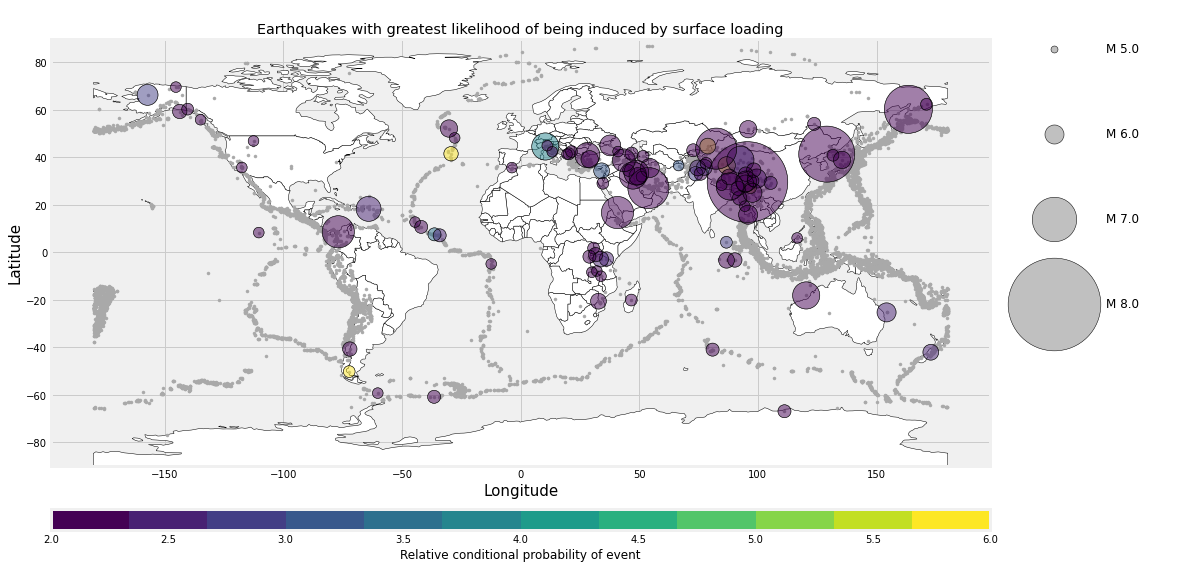

In [22]:
importlib.reload(loadquakes)

loadquakes.probability_map_cb(catalog,sliq_etas.head(100),sliq_etas.cp.head(100),
                              'Earthquakes with greatest likelihood of being induced by surface loading',
                              2,6,11,circle_scale=1e-6)

### 5. Plot the SLIQs from the NND declustered catalog with highest CP

In [7]:
sliq_nnd=NND_declustered.sort_values('cp',ascending=False)
sliq_nnd=sliq_nnd.reset_index()
sliq_nnd=sliq_nnd.drop(['index'], axis=1)


sliq_nnd['dmass']=sliq_nnd['dmass'].astype(float)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Earthquakes with greatest likelihood of being induced by surface loading (NND)'}, xlabel='Longitude', ylabel='Latitude'>

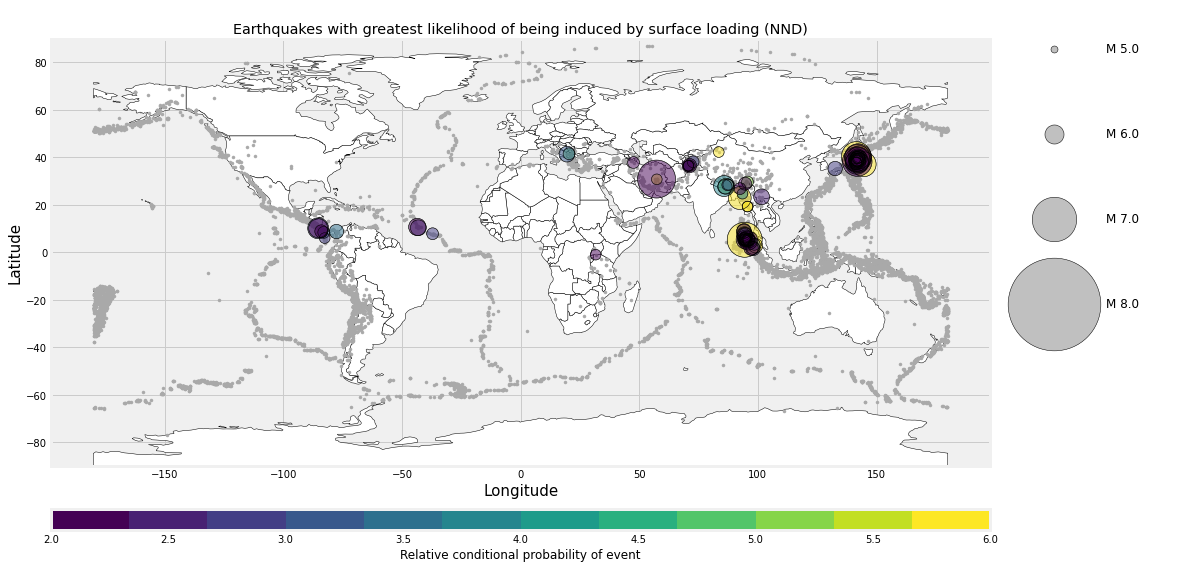

In [29]:
importlib.reload(loadquakes)

loadquakes.probability_map_cb(catalog,sliq_nnd.head(100),sliq_nnd.cp.head(100),
                              'Earthquakes with greatest likelihood of being induced by surface loading (NND)',
                              2,6,11,circle_scale=1e-6)

In [26]:
'''
This version of the map uses the events from NND declustering with eta0 = 10**3
'''
sliq_nnd_v2=NND_declustered_v2.sort_values('cp',ascending=False)
sliq_nnd_v2=sliq_nnd_v2.reset_index()
sliq_nnd_v2=sliq_nnd_v2.drop(['index'], axis=1)


sliq_nnd_v2['dmass']=sliq_nnd_v2['dmass'].astype(float)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Earthquakes with greatest likelihood of being induced by surface loading (NND)'}, xlabel='Longitude', ylabel='Latitude'>

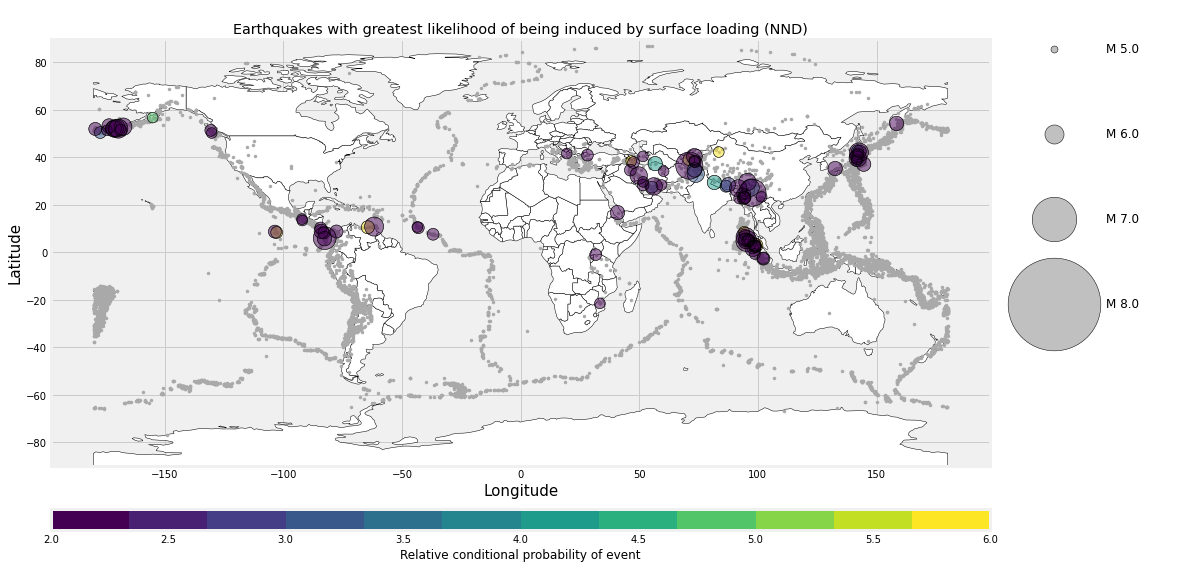

In [28]:
importlib.reload(loadquakes)

loadquakes.probability_map_cb(catalog,sliq_nnd_v2.head(100),sliq_nnd_v2.cp.head(100),
                              'Earthquakes with greatest likelihood of being induced by surface loading (NND)',
                              2,6,11,circle_scale=1e-6)